In [1]:
import pandas as pd
dataset=pd.read_csv('/content/IFND - Copy.csv', encoding=('ISO-8859-1'))

In [2]:
dataset.head()

,id,Statement,Image,Web,Category,Date,Label
0,1,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
1,2,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,TRUE
2,3,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,TRUE
3,4,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,TRUE
4,5,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,TRUE


In [3]:
dataset.duplicated(subset=['Statement']).sum()

51

In [4]:
dataset.drop_duplicates(subset='Statement',keep='first',inplace=True)
dataset.reset_index(inplace=True)

In [5]:
dataset.duplicated(subset=['Statement']).sum()

0

In [6]:
dataset.drop(["id", "index", "Image", "Web", "Date"], axis=1, inplace=True)

In [7]:
dataset.head()

,Statement,Category,Label
0,"WHO praises India's Aarogya Setu app, says it ...",COVID-19,TRUE
1,"In Delhi, Deputy US Secretary of State Stephen...",VIOLENCE,TRUE
2,LAC tensions: China's strategy behind delibera...,TERROR,TRUE
3,India has signed 250 documents on Space cooper...,COVID-19,TRUE
4,Tamil Nadu chief minister's mother passes away...,ELECTION,TRUE


In [8]:
#to check null is present or not
dataset.isna().sum()

Statement    0
Category     0
Label        0
dtype: int64

In [9]:
dataset['Statement']=dataset['Statement'].str.lower()

In [10]:
dataset

,Statement,Category,Label
0,"who praises india's aarogya setu app, says it ...",COVID-19,TRUE
1,"in delhi, deputy us secretary of state stephen...",VIOLENCE,TRUE
2,lac tensions: china's strategy behind delibera...,TERROR,TRUE
3,india has signed 250 documents on space cooper...,COVID-19,TRUE
4,tamil nadu chief minister's mother passes away...,ELECTION,TRUE
...,...,...,...
39104,fact check: this is not bruce lee playing ping...,MISLEADING,Fake
39105,fact check: did japan construct this bridge in...,COVID-19,Fake
39106,fact check: viral video of mexico earthquake i...,MISLEADING,Fake
39107,fact check: ballet performance by chinese coup...,COVID-19,Fake


In [11]:
import re
def remove_regExp(text1):
  text1=re.sub('[^a-z A-Z 0-9,]', '', text1)
  return text1

In [12]:
dataset['Statement']=dataset['Statement'].apply(remove_regExp)

In [13]:
# import string
# string.punctuation


In [14]:
# exclude=string.punctuation

In [15]:
# def remove_punc(text):
#   return text.translate(str.maketrans(' ',' ',exclude))

In [16]:
# dataset['Statement']=dataset['Statement'].apply(remove_punc)

In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
def remove_stopwords(text):
  new_text=[]
  for word in text.split():
    if word in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(word)
  x=new_text[:]
  new_text.clear()
  return " ".join(x)

In [19]:
dataset['Statement']=dataset['Statement'].apply(remove_stopwords)

In [20]:
dataset['Statement'][50]

'unlock 50 schools  uttar pradesh  reopen  october 19, read rules  regulations '

In [21]:
dataset['Statement'][297]

'hathras case bhim army chief, sp, rld meet victims family accused defended  bjp leaders house meet'

In [22]:
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import re
# port_stem = PorterStemmer()

In [23]:
# def stemming(text):
#   con=re.sub('[^a-zA-Z]', ' ', text)
#   con=con.lower()
#   con=con.split()
#   con=[port_stem.stem(word) for word in con if not word in stopwords.words('english')]
#   con=' '.join(con)
#   return con

In [24]:
# stemming('Hathras case: Bhim Army chief, SP, RLD meet victim‰Ûªs family; accused defended at BJP leader‰Ûªs house meet')

Label
Fake    18863
TRUE    20246
Name: Statement, dtype: int64


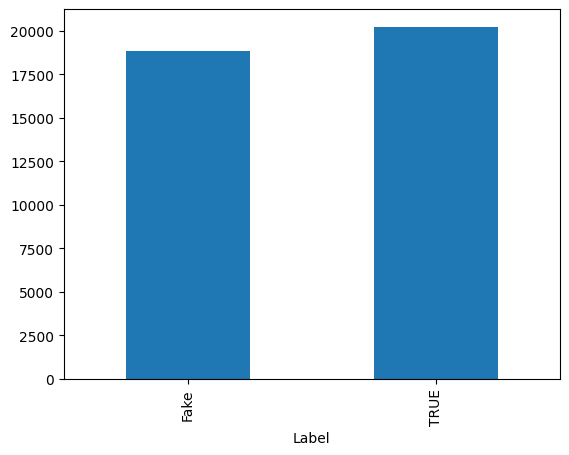

In [25]:
import matplotlib.pyplot as plt
print(dataset.groupby(['Label'])['Statement'].count())
dataset.groupby(['Label'])['Statement'].count().plot(kind="bar")
plt.show()

In [26]:
# import spacy
# nlp=spacy.load('en_core_web_sm')

In [27]:
# text=nlp('unlock 5 0 schools  uttar pradesh  reopen  october 19, read rules  regulations  ')

In [28]:
# def tokenize(text):
#   doc1=nlp(text)
#   for token in doc1:
#     return token

In [29]:
# dataset['Statement'] = dataset['Statement'].apply(tokenize)

In [30]:
dataset.head()

,Statement,Category,Label
0,"praises indias aarogya setu app, says helped...",COVID-19,TRUE
1,"delhi, deputy us secretary state stephen bie...",VIOLENCE,TRUE
2,lac tensions chinas strategy behind deliberate...,TERROR,TRUE
3,india signed 250 documents space cooperation...,COVID-19,TRUE
4,tamil nadu chief ministers mother passes away 93,ELECTION,TRUE


In [31]:
#shuffle
from sklearn.utils import shuffle
dataset=shuffle(dataset)
dataset=dataset.reset_index(drop=True)

In [32]:
dataset.head(10)

,Statement,Category,Label
0,quit india day martyrs remembered august kran...,GOVERNMENT,TRUE
1,ahead kerala civic polls minority votes mind...,ELECTION,TRUE
2,fact check biden didnt ignore india foreign le...,GOVERNMENT,Fake
3,gujarat hc gives clean chit bjp mla 2014 byp...,ELECTION,TRUE
4,fact check old video pakistan passed indian...,VIOLENCE,Fake
5,congress claims support 109 mlas sachin pilo...,ELECTION,TRUE
6,stephen biegun sets stage 22 meet likely late...,GOVERNMENT,TRUE
7,fact check telangana government distributing ...,COVID-19,Fake
8,fake news site invents story covid19 patient ...,MISLEADING,Fake
9,fact check aaditya thackeray spotted rhea ch...,MISLEADING,Fake


Category
COVID-19      6947
ELECTION      3182
GOVERNMENT    7480
MISLEADIND      18
MISLEADING    4054
POLITICS      6043
TERROR        2565
TRAD           141
VIOLENCE      8679
Name: Statement, dtype: int64


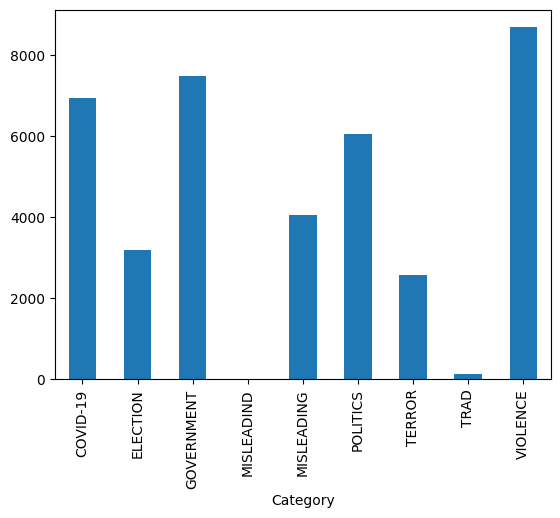

In [33]:
print(dataset.groupby(['Category'])['Statement'].count())
dataset.groupby(['Category'])['Statement'].count().plot(kind="bar")
plt.show()

In [34]:
!pip install wordcloud

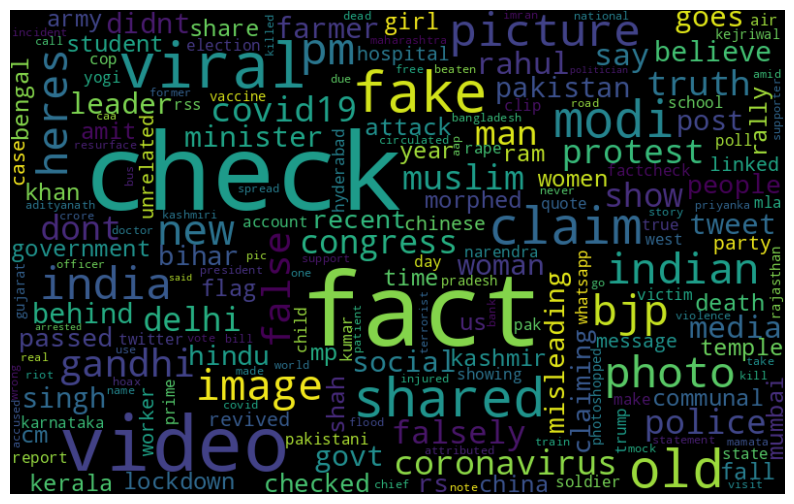

In [35]:
from wordcloud import WordCloud

fake_data=dataset[dataset["Label"]=="Fake"]
all_words=' '.join([Statement for Statement in fake_data.Statement])

wordcloud=WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
import seaborn as sns
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text,column_text,quantity):
  all_words=' '.join([text for text in text[column_text]])
  token_phrase=token_space.tokenize(all_words)
  frequency=nltk.FreqDist(token_phrase)
  dataset_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
  dataset_frequency = dataset_frequency.nlargest(columns="Frequency", n=quantity)
  plt.figure(figsize=(8,4))
  ax=sns.barplot(data=dataset_frequency,x="Word",y="Frequency",color='blue')
  ax.set(ylabel="Count")
  plt.xticks(rotation='vertical')
  plt.show()


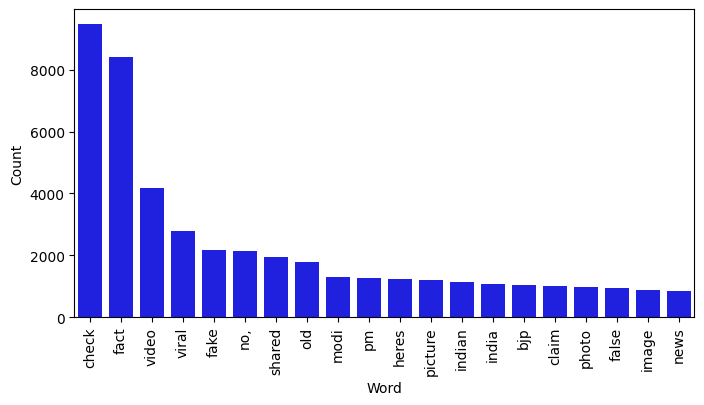

In [37]:
counter(dataset[dataset["Label"]=="Fake"],"Statement",20)

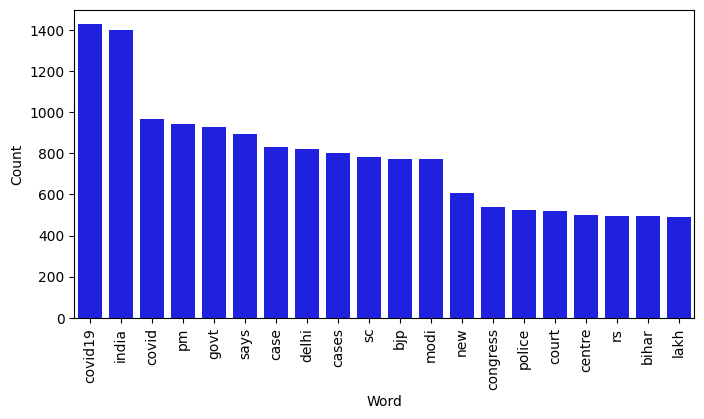

In [38]:
counter(dataset[dataset["Label"]=="TRUE"],"Statement",20)

In [39]:
from nltk.stem.porter import PorterStemmer

In [40]:
ps=PorterStemmer()
def stem_words(text2):
  return " ".join([ps.stem(word) for word in text2.split()])

In [41]:
dataset['Statement']=dataset['Statement'].apply(stem_words)

In [42]:
x=dataset['Statement']
y=dataset['Label']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.35)

In [44]:
x_test

25121    deepak kocchar sent enforc director custodi fi...
936      india selfreli defenc sector boost global stan...
11519    video circul sinc least may 2019 report cyclon...
20688    fact check no, video show muslim brutal hindu ...
14943     mp constabl injur naxal attack balaghat district
                               ...                        
32524       fact check dont believ viral post jnu student,
9182        133 crore rupe spent deepotsav program ayodhya
24692    bengaluru becom epicentr terror activ bjp mp t...
13796                             never spoke vaccin centr
11965    fact check woman abus policemen hathra victim ...
Name: Statement, Length: 13689, dtype: object

In [45]:
y_test

25121    TRUE
936      TRUE
11519    Fake
20688    Fake
14943    TRUE
         ... 
32524    Fake
9182     Fake
24692    TRUE
13796    TRUE
11965    Fake
Name: Label, Length: 13689, dtype: object

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier

# DT=DecisionTreeClassifier()
model_1=DecisionTreeClassifier()
# DT.fit(xv_train,y_train)

In [48]:
# pred_dt=DT.predict(xv_test)

In [49]:
# score=DT.score(xv_test,y_test)

In [50]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
from xgboost import XGBClassifier
model_3 = XGBClassifier()
from sklearn.linear_model import LogisticRegression
model_4 = LogisticRegression()

In [51]:
from sklearn.ensemble import VotingClassifier
final_model = VotingClassifier(estimators=[('DT', model_1), ('RF', model_2), ('XGB', model_3), ('LR', model_4)], voting='hard')

In [52]:
final_model.fit(xv_train, y_train)
pred_final = final_model.predict(xv_test)

In [53]:
score=final_model.score(xv_test,y_test)
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 94.1%


In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_train,final_model.predict(xv_train)))
print(accuracy_score(y_test,final_model.predict(xv_test)))

0.996852871754524
0.9409745050770691


In [55]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred_final))

              precision    recall  f1-score   support

        Fake       0.96      0.91      0.94      6589
        TRUE       0.92      0.97      0.94      7100

    accuracy                           0.94     13689
   macro avg       0.94      0.94      0.94     13689
weighted avg       0.94      0.94      0.94     13689



In [56]:
# from sklearn.metrics import accuracy_score,confusion_matrix
# y_pred=DT.predict(xv_test)
# score=accuracy_score(y_test, y_pred)
# print(score)

In [57]:
#save model
import pickle
filename = 'finalModel.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [58]:
def output_lable(n):
  if n=='Fake':
    return "Fake news"
  elif n=='TRUE':
    return "Not a fake news"

def manual_testing(news):
  testing_news={"text":[news]}
  new_def_test=pd.DataFrame(testing_news)
  new_def_test["text"].str.lower()
  new_def_test["text"]=new_def_test["text"].apply(remove_regExp)
  new_def_test["text"]=new_def_test["text"].apply(remove_stopwords)
  new_def_test["text"]=new_def_test["text"].apply(stem_words)
  new_x_test=new_def_test["text"]
  new_xv_test=vectorization.transform(new_x_test)
  pred_final=final_model.predict(new_xv_test)

  return print("Prediction : {}".format(output_lable(pred_final[0])))

In [59]:
# news=str(input())
# manual_testing(news)